# Force the encoder

encoder must take the shape from the Baglietto paper
Draw x0 from the gaussian with std 25.  Set x1 to be a piecewise step based on x0

In [1]:
import numpy as np
from numpy import linalg as LA
import tensorflow as tf
import matplotlib.pyplot as plt
# fix random seed for reproducibility
np.random.seed()

m = 1 # dimension
k_squared = 0.04
m_inv = 1.0
learning_rate = 0.001
epochs = 10000
batch_size = 100
x_stddev = 5
test_averaging=100
decay = 1 - 1*1e-10

# x_train = np.zeros((epochs,1))
# for i in range(0,epochs):
#     x_train[i]=np.random.normal(scale = x_stddev)
# #     x_train[i]=np.random.uniform(-20,20,1)


In [2]:
# declare the training data placeholders
# input x - just one is x0
x0 = tf.placeholder(tf.float32, [None, 1])
# x1 is also a placeholder now
x1 = tf.placeholder(tf.float32, [None, 1])

In [3]:
# declare weights connecting x1+z to a hidden layer
W3 = tf.Variable(tf.random_normal([1, 30], stddev=0.03), name='W1')
b3 = tf.Variable(tf.random_normal([30]), name='b3')
# and the weights connecting the hidden layer to the u1 output layer
W4 = tf.Variable(tf.random_normal([30, 1], stddev=0.03), name='W2')
b4 = tf.Variable(tf.random_normal([1]), name='b4')

In [4]:
# x1 = u1 + x0
u1 = x1 - x0

# add noise to x1
z = tf.random_normal([1,1])
x1_noise = x1 + z

hidden_out_2 = tf.layers.dense(
  x1_noise, 30, tf.nn.relu, use_bias=True)
u2 = tf.layers.dense(
  hidden_out_2, m, activation=tf.identity, use_bias=True)

x2 = x1 - u2

In [5]:
wits_cost = tf.add(tf.multiply(m_inv,tf.multiply(k_squared, tf.norm(u1,'euclidean'))),
                   tf.multiply(m_inv,tf.norm(x2,'euclidean')))
# wits_cost = tf.norm(u1)

adaptive_learning_rate = tf.placeholder_with_default(learning_rate, [])


optimizer = tf.train.AdamOptimizer(learning_rate=adaptive_learning_rate).minimize(wits_cost)
                                                                                  
# finally setup the initialisation operator
init_op = tf.global_variables_initializer()

('Epoch: ', 0, 'Cost: ', 40.086864)
('Epoch: ', 1, 'Cost: ', 39.949646)
('Epoch: ', 2, 'Cost: ', 39.292015)
('Epoch: ', 3, 'Cost: ', 38.961388)
('Epoch: ', 4, 'Cost: ', 38.76009)
('Epoch: ', 5, 'Cost: ', 37.55651)
('Epoch: ', 6, 'Cost: ', 37.270428)
('Epoch: ', 7, 'Cost: ', 36.862587)
('Epoch: ', 8, 'Cost: ', 36.83698)
('Epoch: ', 9, 'Cost: ', 36.368687)
('Epoch: ', 10, 'Cost: ', 35.091663)
('Epoch: ', 11, 'Cost: ', 33.973553)
('Epoch: ', 12, 'Cost: ', 33.80124)
('Epoch: ', 13, 'Cost: ', 34.288826)
('Epoch: ', 14, 'Cost: ', 33.606518)
('Epoch: ', 15, 'Cost: ', 33.429222)
('Epoch: ', 16, 'Cost: ', 32.845642)
('Epoch: ', 17, 'Cost: ', 32.87237)
('Epoch: ', 18, 'Cost: ', 32.96294)
('Epoch: ', 19, 'Cost: ', 32.66073)
('Epoch: ', 20, 'Cost: ', 31.56381)
('Epoch: ', 21, 'Cost: ', 30.874714)
('Epoch: ', 22, 'Cost: ', 30.597242)
('Epoch: ', 23, 'Cost: ', 29.567905)
('Epoch: ', 24, 'Cost: ', 29.185452)
('Epoch: ', 25, 'Cost: ', 29.430399)
('Epoch: ', 26, 'Cost: ', 28.090736)
('Epoch: ', 27, 'Co

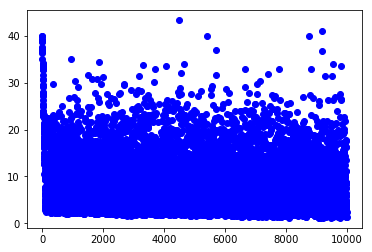

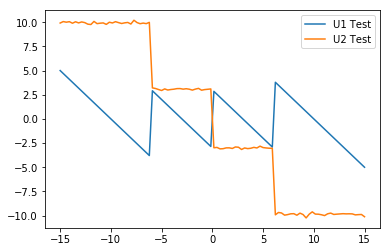

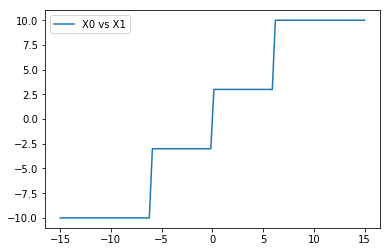

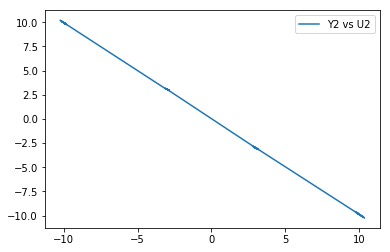

In [6]:
plt.figure()

# start the session
with tf.Session() as sess:
    #    initialize the variables
    sess.run(init_op)
    
    x_train = np.random.normal(size=epochs * batch_size * m, scale=x_stddev)
    x1_train = np.zeros(epochs * batch_size * m)
    for data in range(epochs * batch_size * m,):
        if x_train[data]<-6:
            x1_train[data]=-10
        elif x_train[data]<0:
            x1_train[data]=-3
        elif x_train[data]<6:
            x1_train[data]=3
        else: x1_train[data]=10
    
    
    for epoch in range(epochs):
#         x_batch = x_train[epoch].reshape(1,1)
        x_batch = x_train[epoch: epoch + (batch_size * m)].reshape((batch_size, m))
        x1_batch = x1_train[epoch: epoch + (batch_size * m)].reshape((batch_size, m))
    #         c = sess.run(optimiser, feed_dict={x0:np.zeros((10,1))})#{x0: x_batch})
    #         sess.run(optimiser, feed_dict={x0: x_batch})
        _,cost = sess.run([optimizer, wits_cost], feed_dict={x0: x_batch, x1: x1_batch,
                         adaptive_learning_rate: learning_rate * (decay**epoch)})
    #         print("Epoch:", (epoch + 1), "cost =", "{:.3f}")
    #         print(u1)
        print("Epoch: ", epoch, "Cost: ",cost)
        plt.plot(epoch, cost, 'bo')

    # Test over a continuous range of X
#     x0_test = np.linspace(-2*x_stddev, 2*x_stddev, num=100)
    x0_test = np.linspace(-15, 15, num=100)
    x1_test = np.zeros((100,1))
    for data in range(100):
        if x0_test[data]<-6:
            x1_test[data]=-10
        elif x0_test[data]<0:
            x1_test[data]=-3
        elif x0_test[data]<6:
            x1_test[data]=3
        else: x1_test[data]=10
    u1_test, u2_test, x1_noise_test = np.zeros((1, 100)), np.zeros((1, 100)), np.zeros((1,100))

    for i in range(100):
        u1t, u2t, x1_noiset = 0, 0, 0
        for _ in range(test_averaging):
          u1tmp, u2tmp, x1_noisetmp = sess.run(
            [u1, u2, x1_noise],
            feed_dict={x0: x0_test[i].reshape((1, 1)), x1: x1_test[i].reshape((1,1))})

          u1t += u1tmp
          u2t += u2tmp
          x1_noiset += x1_noisetmp

        u1_test[0, i] = u1t / test_averaging
        u2_test[0, i] = -u2t / test_averaging
        x1_noise_test[0,i] = x1_noiset / test_averaging

# print(cost)
plt.show()


l1, = plt.plot(x0_test, u1_test[0], label="U1 Test")
l3, = plt.plot(x0_test, u2_test[0], label="U2 Test")
plt.legend(handles=[l1, l3])
# plt.title("{} Unit NN With Activation Fn {}".format(
#   str(num_units_1), str(activation_fn)))
# plt.savefig("figure_u_1.png
plt.show()

plt.clf()
l2, = plt.plot(x0_test, x1_test, label="X0 vs X1")
# plt.title("{} Unit NN With Activation Fn {}".format(
#   str(num_units_1), str(activation_fn)))
plt.legend(handles=[l2])
# plt.savefig("figure_x_1.png")
plt.show()

plt.clf()
l2, = plt.plot(x1_noise_test[0], u2_test[0], label="Y2 vs U2")
# plt.title("{} Unit NN With Activation Fn {}".format(
#   str(num_units_1), str(activation_fn)))
plt.legend(handles=[l2])
# plt.savefig("figure_x_1.png")
plt.show()